# Overfitting and Uderfitting, Variance vs. Bias

We'll use a 2-dimensional dataset  dataset containing historical records on the
change in the water level, x, and the amount of water flowing out of the dam,
y.
This dataset is divided into three parts:
- A training set that your model will learn on: X, y
- A cross validation set for determining the regularization parameter: Xval, yval
- A test set for evaluating performance. These are unseen examples which our model did not see during training: Xtest, ytest

this dataset can both be modeled with a linear function or a polynomial with higher degrees of freedom. This'll hopefully help us understand what underfitting, and overfitting may imply in practice.
This note is reproduction of the excercise 5 in the [Coursera ML class](https://www.coursera.org/learn/machine-learning), presented by Andrew Ng. Those excersizes are of course developed by Matlab. 

In the first half of the exercise, we will implement regularized linear regression to predict the amount of water flowing out of a dam using the change
of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s.
variance


Importing required libraries and developed linear regression class as lfit

In [1]:

# -*- coding: utf-8 -*-
"""
Created on Wed Jan 13 18:35:28 2021

@author: zayn
"""
import sys
sys.path.append('../software/algorithms/')   
    

import numpy as np
import fitting_cls as lfit
import scipy.io
import matplotlib.pyplot as plt

Importing the dataset

In [3]:
mat = scipy.io.loadmat('../data/linear_fitting.mat')

X=mat["X"]
y=mat["y"]
m=y.size

X_val=mat["Xval"]
y_val=mat["yval"]

X_test=mat["Xtest"]
y_test=mat["ytest"]

importing linear regression class used throughout the note

In [4]:
lreg_fit=lfit.lfit()

It's generaly a good idea to normalize input features to zero mean and unit variance. I'm personaly a great fan of this trick :)

In [5]:
Xn, xmeanv, xstdv=lreg_fit.featureNormalize(X)
X_valn=(X_val-xmeanv)/xstdv


## Visualizing the dataset

Text(0, 0.5, 'Water flowing out of the dam (y)')

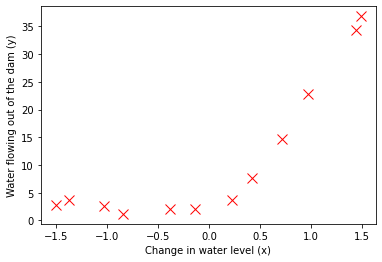

In [6]:
fig, ax = plt.subplots()

ax.plot(Xn, y, 'rx', markersize=10, linewidth= 1.5)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')

In [7]:
Xe=np.append(np.ones([Xn.shape[0],1]),Xn,axis=1)

nt=Xe.shape[1]

theta=np.zeros([nt,1])

rlambda=1

J, grad=lreg_fit.linearRegCostFunction(Xe, y, theta, rlambda)

##  linear regression

In this part, we set regularization parameter λ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional θ, regularization will not be incredibly helpful for a θ of such low dimension. In the later parts of the exercise, we will be using polynomial regression with regularization.

In [16]:
num_iters=400
alpha=0.03
rlambda=0

theta, J_history, grad=lreg_fit.trainLinearReg(Xe, y,  num_iters, alpha,rlambda)
y_est=Xe@theta

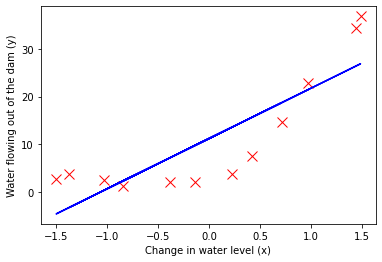

In [17]:
fig, ax = plt.subplots()

ax.plot(Xn, y, 'rx', markersize=10, linewidth= 1.5)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.plot(Xn, y_est, 'b-', linewidth= 1.5)   


In the following figure, we can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model-the linear regression model is too simple and is unable to fit our dataset well. In the next section, we will implement polynomial regression to fit a better model for this dataset

Text(0, 0.5, 'estimation error')

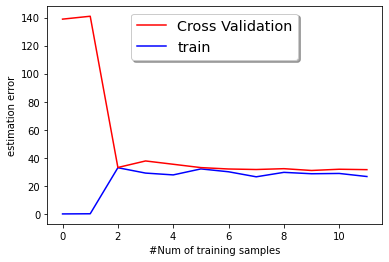

In [10]:
X_vale=np.append(np.ones([X_valn.shape[0],1]),X_valn,axis=1)

error_train, error_val  =lreg_fit.learningCurve(Xe, y,  X_vale, y_val,rlambda)

fig2, ax2 = plt.subplots()

h1=ax2.plot(np.arange(0,error_train.size), error_train, 'b-', linewidth= 1.5, label='train')
h2=ax2.plot(np.arange(0,error_val.size), error_val, 'r-', linewidth= 1.5, label='Cross Validation')
handles, labels = ax2.get_legend_handles_labels()
# ax.legend()
legend = ax2.legend(handles[::-1], labels[::-1],loc='upper center', shadow=True, fontsize='x-large')

ax2.set_xlabel('#Num of training samples')
ax2.set_ylabel('estimation error')

## Polynomial Regresion

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part, we will address this problem by adding more features using the higher powers of the existing feature x in the dataset.

In [11]:
p=8
Xp=lreg_fit.polyfeatures(X,p)

Xpn,Xpmean, Xpstd=lreg_fit.featureNormalize(Xp)

Xpne=np.append(np.ones([Xpn.shape[0],1]),Xpn, axis=1)
num_iters=400
alpha=0.03

However, one possible issue here would be overfitting problem, which we will address in the next section

### Regularized polynomial linear regression

One way to combat the overfitting (high-variance) problem in  polynomial linear regression is to add regularization to the model. we will see how regularization can lead to a better model.

In [21]:
rlambda=1

theta, J_history, grad=lreg_fit.trainLinearReg(Xpne, y,  num_iters, alpha,rlambda)


X_est, yp_est=lreg_fit.plotFit(min(X), max(X), Xpmean, Xpstd, theta, p)

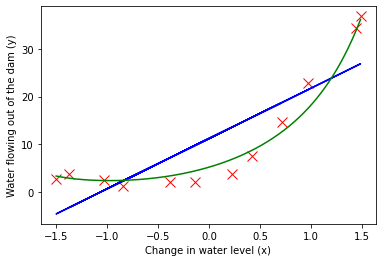

In [22]:
fig, ax = plt.subplots()

ax.plot(Xn, y, 'rx', markersize=10, linewidth= 1.5)
ax.set_xlabel('Change in water level (x)')
ax.set_ylabel('Water flowing out of the dam (y)')
ax.plot(Xn, y_est, 'b-', linewidth= 1.5) 
ax.plot(X_est, yp_est, 'g-', linewidth= 1.5)


For λ = 1, we see a polynomial fit that follows the data trend well and a learning curve showing that both the cross
validation and training error converge to a relatively low value. This shows the λ = 1 regularized polynomial regression model does not have the highbias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

Text(0.5, 1.0, 'poly lin. regresion train and valid. error curve')

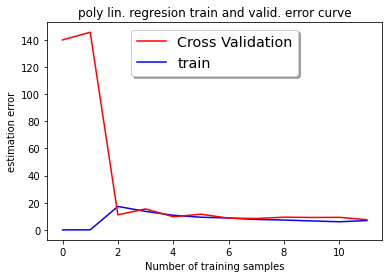

In [23]:
X_valp=lreg_fit.polyfeatures(X_val,p)

X_valpn=lreg_fit.postNormalize(X_valp, Xpmean, Xpstd)

X_valpne=np.append(np.ones([X_valpn.shape[0],1]),X_valpn, axis=1)

error_train, error_val  =lreg_fit.learningCurve(Xpne, y,  X_valpne, y_val,rlambda)

fig4, ax4 = plt.subplots()

h1=ax4.plot(np.arange(0,error_train.size), error_train, 'b-', linewidth= 1.5, label='train')
h2=ax4.plot(np.arange(0,error_val.size), error_val, 'r-', linewidth= 1.5, label='Cross Validation')
handles, labels = ax4.get_legend_handles_labels()
# ax.legend()
legend = ax4.legend(handles[::-1], labels[::-1],loc='upper center', shadow=True, fontsize='x-large')

ax4.set_xlabel('Number of training samples')
ax4.set_ylabel('estimation error')
ax4.set_title('poly lin. regresion train and valid. error curve')

## Selecting λ using a cross validation set

We can observe that the value of λ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization (λ = 0) fits the training set well, but does not generalize. Conversely, a model with too much regularization (λ = 100) does not fit the training set and testing set well. A good choice of λ (e.g., λ = 1) can provide a good fit to the data.

In this section, we will implement an automated method to select the λ parameter. Concretely, we will use a cross validation set to evaluate how good each λ value is. After selecting the best λ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.


Text(0.5, 1.0, 'train and valid. error versus lambda')

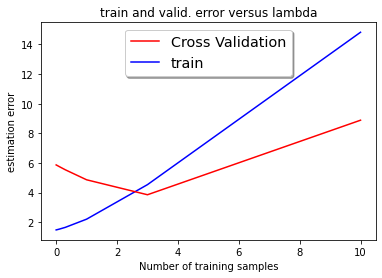

In [14]:

rlambda_vec, error_train, error_val=lreg_fit.validationCurve(Xpne, y, X_valpne, y_val)

fig5, ax5 = plt.subplots()

h1=ax5.plot(rlambda_vec, error_train, 'b-', linewidth= 1.5, label='train')
h2=ax5.plot(rlambda_vec, error_val, 'r-', linewidth= 1.5, label='Cross Validation')
handles, labels = ax5.get_legend_handles_labels()
# ax.legend()
legend = ax5.legend(handles[::-1], labels[::-1],loc='upper center', shadow=True, fontsize='x-large')

ax5.set_xlabel('Number of training samples')
ax5.set_ylabel('estimation error')
ax5.set_title('train and valid. error versus lambda')

In this figure, we can see that the best value of λ is around 3.

To get a better indication of the model’s performance in the real world, it is important to evaluate the final model on a test set that was not used in any part of training (that is, it was neither used to select the λ parameters, nor to learn the model parameters θ). We should compute the test error using the best value of λ we found.

test error with optimized parameters is:  [3.55119799]


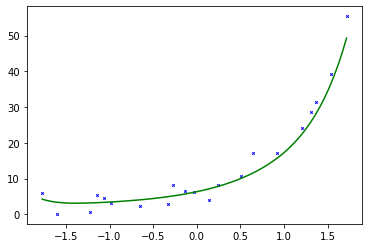

In [26]:
rlambda=3



theta, J_history, grad=lreg_fit.trainLinearReg(Xpne, y,  num_iters, alpha,rlambda)


X_testp=lreg_fit.polyfeatures(X_test,p)

X_testpn=lreg_fit.postNormalize(X_testp, Xpmean, Xpstd)

X_testpne=np.append(np.ones([X_testpn.shape[0],1]),X_testpn, axis=1)

J_test, g_test=lreg_fit.linearRegCostFunction(X_testpne, y_test,theta, rlambda=0)
print('test error with optimized parameters is: ', J_test[0])

X_est, yp_est=lreg_fit.plotFit(min(X_test), max(X_test), Xpmean, Xpstd, theta, p)

fig, ax = plt.subplots()

ax.plot(X_testpn[:,0], y_test, 'bx', markersize=2.5,linewidth= 1.5)   

ax.plot(X_est, yp_est, 'g-', linewidth= 1.5)
